# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib as plt
#считаем данные
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#выведем первые 10 строк
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
#выведем общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:** Данные разделены на 22 столбца и 23699 строк. По наименованию столбцов можно узнать различную информацию о квартире( её местоположение, тип и другое). Присутствуют пропуски в размерах жилой площади, кухни и высоте потолков, которые можно заполнить средним или медианным значением. Информацию о наличии балкона, парка и водоемов могли посчитать ненужной, и если её заполняли пользователи, то её могли не написать. Пропуски в количестве дней, в течение которых висело объявление до продажи квартиры, могут быть объяснены ошибкой в переносе данных или различии в единицах измерения времени.

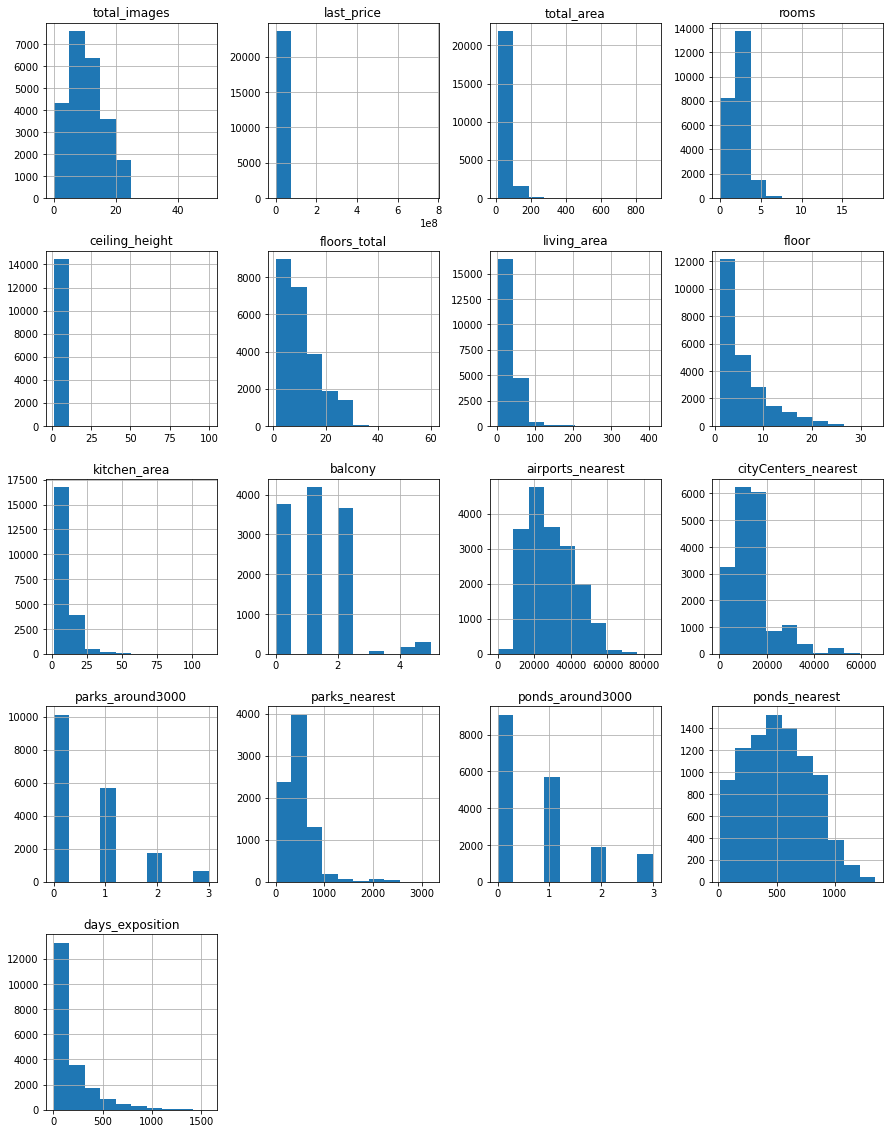

In [3]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [4]:
# Посмотрим в каких столбцах есть пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

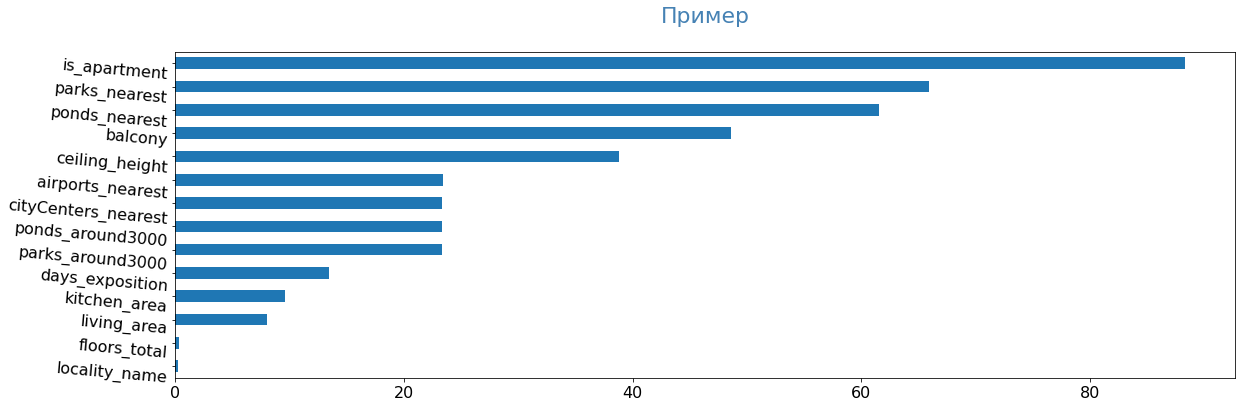

In [6]:
pass_value_barh(data)

In [7]:
# Заменим пропуски высоты потолков на медианные значения по каждой локации
locality_name = 'Санкт-Петербург'
median_ceiling_height = data.loc[data['locality_name']==locality_name, 'ceiling_height'].median()
for locality_name in data['locality_name'].unique():
    median_ceiling_height = data.loc[data['locality_name']==locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) &
        (data['locality_name']==locality_name), 'ceiling_height'] = median_ceiling_height
# Оставшиеся пропуски заполним медианным значением в целом по всему столбцу
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#Часть пропусков не было заполнено, так как некоторые населенные пункты имеются только в единственном количестве, либо все значения высоты потолков для конкретного города пропущены.
#Избавляемся от строк с пропусками
data.drop(data[data['ceiling_height'].isnull() == True].index, inplace=True)

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [69]:
# check
data[data['floors_total'] < data['floor']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_no_duplicates,price_of_square_meter,day_of_the_week_exposition,month_exposition,year_exposition,type_of_floor,cityCenters_nearest_km


В строках, где отсутствует локация, заменим пропущенное значение на no_info, так как эти пропуски связаны с ошибкой при включении данных. Также мы заменим пустые значения для жилой площади и кухни средним значением. В строках, где отсутствуют значения у балкона, нахождения рядом парка или пруда в районе 3000, поставим 0, так как, скорее всего, пропуски обусловлены отсутсвием данных локаций и нежеланием человека упоминать этот факт. Пропуски в days_exposition пока оставим, так как видно, что эти данные собираются автоматически, поэтому или произошел сбой, или помещение так и не было продано.

In [9]:
#Произведем замену у строк с отсутствующей именем локации, is_apartment и балконом
data['locality_name'] = data['locality_name'].fillna('no_info')
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(value=0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
# Заменяем пустые значения жилой площади и кухни
mean_proportion_living_area = (data['living_area'] / data['total_area']).mean()
data['living_area'] = data['living_area'].fillna(data['total_area']*mean_proportion_living_area)
kitchen_ratio = data['kitchen_area'].median() / data['total_area'].median()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)
data = data.loc[data['total_area']*0.9>=(data ['living_area']+data ['kitchen_area'])]

In [10]:
data.shape

(23057, 22)

In [11]:
#Рассмотрим отношение размера кухни к общей площади кухни по категориям (<40, >=41,>=54,>=70,>=150)
#print((data.loc[(data['total_area'] <= 40), 'kitchen_area']/data.loc[(data['total_area'] <= 40), 'total_area']).median())
#print((data.loc[(data['total_area'] >= 41) & (data['total_area'] <= 52), 'kitchen_area']/data.loc[(data['total_area'] > 40) & (data['total_area'] <= 52), 'total_area']).median())
#print((data.loc[(data['total_area'] >= 54) & (data['total_area'] <= 70), 'kitchen_area']/data.loc[(data['total_area'] <= 70) & (data['total_area'] > 52), 'total_area']).median())
#print((data.loc[(data['total_area'] >= 70) & (data['total_area'] <= 150), 'kitchen_area']/data.loc[(data['total_area'] > 70) & (data['total_area'] <= 150), 'total_area']).median())
#print((data.loc[(data['total_area'] >= 150), 'kitchen_area']/data.loc[(data['total_area'] > 150), 'total_area']).median())
#data.loc[(data['kitchen_area'].isnull() == True) & (data['total_area'] <= 40), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['total_area'] <= 40), 'total_area'] * 0.24
#data.loc[(data['kitchen_area'].isnull() == True) & (data['total_area'] >40) & (data['total_area'] <= 52), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['total_area'] >40) & (data['total_area'] <= 52),'total_area'] * 0.165
#data.loc[(data['kitchen_area'].isnull() == True) & (data['total_area'] >52) & (data['total_area'] <= 70), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['total_area'] >52) & (data['total_area'] <= 70),'total_area'] * 0.15
#data.loc[(data['kitchen_area'].isnull() == True) & (data['total_area'] >70) & (data['total_area'] <= 150), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['total_area'] >70) & (data['total_area'] <= 150),'total_area'] * 0.14
#data.loc[(data['kitchen_area'].isnull() == True) & (data['total_area'] >150), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['total_area'] > 150), 'total_area'] * 0.11


In [12]:
# check
data[data['total_area']*0.9 <= (data ['living_area']+data ['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
2397,70.0,56.0,7.0
2598,45.0,33.0,7.5
3433,50.0,34.0,11.0
4383,30.0,18.0,9.0
8107,60.0,48.0,6.0
14267,40.0,19.0,17.0
16990,50.0,30.0,15.0
17654,50.0,35.0,10.0
18492,30.0,20.0,7.0
19272,60.0,40.0,14.0


In [13]:
median_airports_nearest = data.pivot_table(index='locality_name', values='airports_nearest', aggfunc='median')
# заменим значения циклом 
# не берем Санкт-Петербург т.к. значения будут слишком сильно смещены
for i in list(median_airports_nearest.index):
    if i not in ['Санкт-Петербург', 'no_info']:
        data.loc[(data['locality_name'] == i)\
                       & (data['airports_nearest'].isna()), 'airports_nearest'] =\
         float(median_airports_nearest[median_airports_nearest.index==i]['airports_nearest'])
# заменим значения циклом  на общую медиану (кроме CПб)
for i in list(median_airports_nearest.index):
    if i not in ['Санкт-Петербург']:
        data.loc[(data['locality_name'] == i)\
               & (data['airports_nearest'].isna()), 'airports_nearest'] =\
        data['airports_nearest'].median()
# оставляем пропуски в airports_nearest в Санкт-Петербурге

In [14]:
# Переписал код для заполнения пропусков, код сверху
# Заменим пропуски airports_nearest на медианные значения по каждой локации
#median_airports_nearest = data.loc[data['locality_name']==locality_name, 'airports_nearest'].median()
#for locality_name in data['locality_name'].unique():
    #median_airports_nearest = data.loc[data['locality_name']==locality_name, 'airports_nearest'].median()
    #data.loc[(data['airports_nearest'].isna()) &
       # (data['locality_name']==locality_name), 'airports_nearest'] = median_airports_nearest
# Оставшиеся пропуски заполним медианным значением в целом по всему столбцу
#data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

In [15]:
median_cityCenters_nearest = data.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='median')
# заменим значения циклом 
for i in list(median_cityCenters_nearest.index):
    if i != 'no_info':
        data.loc[data['cityCenters_nearest'].isna()\
                       &(data['locality_name']==i), 'cityCenters_nearest'] =\
        float(median_cityCenters_nearest[median_cityCenters_nearest.index==i]['cityCenters_nearest'])
#После заполнения остались пропуски, но пока оставим как есть, считаю, что заполнять эти пропуски медианным значением грубо.

In [16]:
# Переписал код для заполнения пропусков, код сверху
# Заменим пропуски cityCenters_nearest на медианные значения по каждой локации
#median_cityCenters_nearest = data.loc[data['locality_name']==locality_name, 'cityCenters_nearest'].median()
#for locality_name in data['locality_name'].unique():
    #median_cityCenters_nearest = data.loc[data['locality_name']==locality_name, 'cityCenters_nearest'].median()
    #data.loc[(data['cityCenters_nearest'].isna()) &
        #(data['locality_name']==locality_name), 'cityCenters_nearest'] = median_cityCenters_nearest
# Оставшиеся пропуски заполним медианным значением в целом по всему столбцу
#data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

<div class="alert alert-dan
            ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Не изучено распределение пропусков по городам до заполнения значений в ['city_сenters_nearest']
        
к каким населенным пунктам относятся и оценить степень влияния пропусков на дальнейший анализ (будут мешать или нет)
        

In [17]:
# Принял решение не заполнять пропуски в этом столбце медианными значениями, оставляю, как есть, данные могли не внести по ошибке пользователи
# Заменим пропуски parks_nearest на медианные значения по каждой локации
#median_parks_nearest = data.loc[data['locality_name']==locality_name, 'parks_nearest'].median()
#for locality_name in data['locality_name'].unique():
   # median_parks_nearest = data.loc[data['locality_name']==locality_name, 'parks_nearest'].median()
    #data.loc[(data['parks_nearest'].isna()) &
        #(data['locality_name']==locality_name), 'parks_nearest'] = median_parks_nearest
# Оставшиеся пропуски заполним медианным значением в целом по всему столбцу
#data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

In [18]:
# Заменим пропуски ponds_nearest на медианные значения по каждой локации
median_ponds_nearest = data.loc[data['locality_name']==locality_name, 'ponds_nearest'].median()
for locality_name in data['locality_name'].unique():
    median_ponds_nearest = data.loc[data['locality_name']==locality_name, 'ponds_nearest'].median()
    data.loc[(data['ponds_nearest'].isna()) &
        (data['locality_name']==locality_name), 'ponds_nearest'] = median_ponds_nearest
# Оставшиеся пропуски заполним медианным значением в целом по всему столбцу
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
data.isnull().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               83
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5287
cityCenters_nearest      5212
parks_around3000            0
parks_nearest           15204
ponds_around3000            0
ponds_nearest               0
days_exposition          3086
dtype: int64

Теперь поменяем типы данных у различных столбцов. is_apartment стоит поменять на bool, так как он будет либо True, либо False. locality_name поменяем на str, так как это всегда будет название обьекта. floors_total и balcony поменяем на int, потому что этаж и балкон может быть только целочисленный, как и количество парков и водоемов.

In [19]:
# Приводим этажность и balcony к целочисленному типу
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
# Приводим is_apartment к типу bool
data['is_apartment'] = data['is_apartment'].astype('bool')  
# Приводим локацию к типу str
data['locality_name'] = data['locality_name'].astype('str')
#округлим значения в days_exposition
data['days_exposition'] = round(data['days_exposition'],0)
#приводим к временному формату first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Теперь устраним неявные дубликаты в столбце с названиями

In [20]:
#посмотрим все уникальные значения
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [21]:
#создадим цункцию для удаления дубликатов
def locality_name_cat(row):
    if 'Петровское' in row:
        return 'посёлок Петровское'
    elif 'Лесогорский' in row:
        return 'поселок городского типа Лесогорский'
    elif 'Янино-1' in row:
        return 'городской посёлок Янино-1'
    elif 'Вещево' in row:
        return 'посёлок при железнодорожной станции Вещево'
    elif 'Токсово' in row:
        return 'посёлок городского типа Токсово'
    elif 'Старая Малукса' in row:
        return 'посёлок Старая Малукса'
    elif 'Мурино' in row:
        return 'посёлок Мурино'
    elif 'Кудрово' in row:
        return 'деревня Кудрово'
    elif 'Аннино' in row:
        return 'посёлок Аннино'
    elif 'Красный Бор' in row:
        return 'посёлок городского типа Красный Бор'
    elif 'Фёдоровское' in row:
        return 'Фёдоровское'
    elif 'Лебяжье' in row:
        return 'посёлок городского типа Лебяжье'
    elif 'Кузьмоловский' in row:
        return 'посёлок городского типа Кузьмоловский'
    elif 'Новый Свет' in row:
        return 'посёлок Новый Свет'
    elif 'Никольское' in row:
        return 'село Никольское'
    elif 'Бугры' in row:
        return 'посёлок Бугры'
    elif 'Рощино' in row:
        return 'посёлок городского типа Рощино'
    elif 'Щеглово' in row:
        return 'посёлок Щеглово'
    elif 'Мичуринское' in row:
        return 'посёлок Мичуринское'
    elif 'Калитино' in row:
        return 'поселок Калитино'
    elif 'Приладожский' in row:
        return 'поселок городского типа Приладожский'
    elif 'Пансионат Зелёный Бор' in row:
        return 'посёлок Пансионат Зелёный Бор'
    elif 'Рабитицы' in row:
        return 'поселок Рабитицы'
    elif 'Лесное' in row:
        return 'поселок Лесное'
    elif 'Павлово' in row:
        return 'село Павлово'
    elif 'Победа' in row:
        return 'Победа'
    elif 'Терволово' in row:
        return 'Терволово'
    elif 'Рахья' in row:
        return 'Рахья'
    elif 'Зимитицы' in row:
        return 'Зимитицы'
    elif 'Свердлова' in row:
        return 'Свердлова'
    elif 'Рябово' in row:
        return 'Рябово'
    elif 'Любань' in row:
        return 'Любань'
    elif 'Стеклянный' in row:
        return 'Стеклянный'
    elif 'Форносово' in row:
        return 'Форносово'
    elif 'Поляны' in row:
        return 'Поляны'
    elif 'Мга' in row:
        return 'Мга'
    elif 'Ильичёво' in row:
        return 'Ильичёво'
    elif 'Гаврилово' in row:
        return 'Гаврилово'
    elif 'Назия' in row:
        return 'Назия'
    elif 'Гарболово' in row:
        return 'Гарболово'
    elif 'Приветнинское' in row:
        return 'Приветнинское'
    elif 'Мельниково' in row:
        return 'Мельниково'
    elif 'Перово' in row:
        return 'Перово'
    elif 'Усть-Луга' in row:
        return 'Усть-Луга'
    elif 'Сумино' in row:
        return 'Сумино'
    elif 'Советский' in row:
        return 'Советский'
    elif 'Вырица' in row:
        return 'Вырица'
    elif 'Тельмана' in row:
        return 'Тельмана'
    elif 'Большая Ижора' in row:
        return 'Большая Ижора'
    elif 'Возрождение' in row:
        return 'Возрождение'
    elif 'Лисий Нос' in row:
        return 'Лисий Нос'
    elif 'Жилгородок' in row:
        return 'Жилгородок'
    elif 'Громово' in row:
        return 'Громово'
    elif 'Коробицыно' in row:
        return 'Коробицыно'
    elif 'Кобралово' in row:
        return 'Кобралово'
    else:
        return row

# создадим новый стобец в данных, куда занесем названия без дубликатов
data['locality_name_no_duplicates'] = data['locality_name'].apply(locality_name_cat)

In [22]:
data['locality_name_no_duplicates'].nunique()

304

Теперь рассмотрим аномалии в данных в разных столбцах.

<AxesSubplot:>

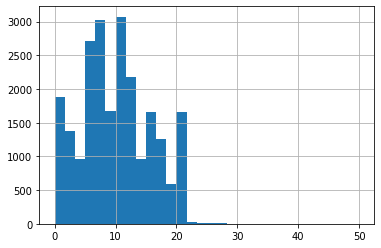

In [23]:
data['total_images'].hist(bins=30)
# сильных аномалий нет, все ожидаемо

<AxesSubplot:>

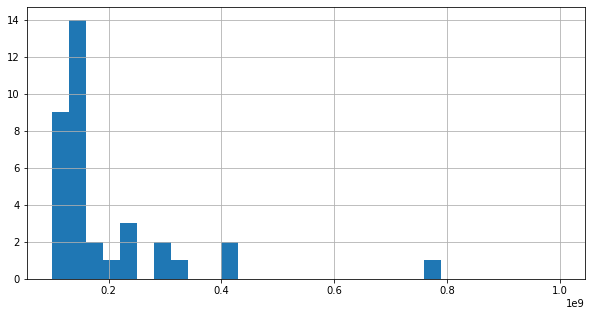

In [24]:
data['last_price'].hist(bins=30, range=(10**8, 10*10**8), figsize=(10,5))
# выбросы по ценам оставляем, помещения могут стоить больше нескольких десятков миллионов

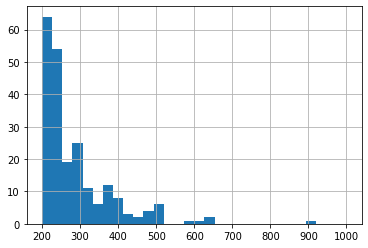

In [25]:
data['total_area'].hist(bins=30,  range=(200, 1000))
#помещения площадью более 500 м модно считать выбросами, поэтому удалим их
data = data.loc[data['total_area'] <= 500]

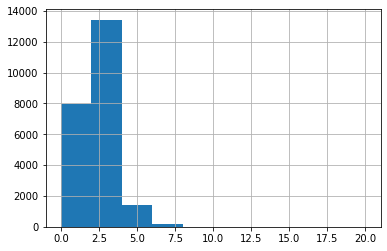

In [26]:
data['rooms'].hist(range=(0,20))
# по комантам ожидаемые выбросы, оставляем, но есть помещения с 0 количеством комнат, исправляем на 1
data.loc[data['rooms']==0, 'rooms'] = 1

In [27]:
round(data['ceiling_height'],0).value_counts()
#значения больше 10 м явно ошибки, поэтому все значения больше 10 делим на 10
def ceiling_height_more_ten(row):
    if row['ceiling_height'] > 10:
        return row['ceiling_height'] * 0.1
    else:
        return row['ceiling_height']
# присваиваем новые значения
data['ceiling_height'] = data.apply(ceiling_height_more_ten, axis=1)

In [28]:
data[data['floors_total']>40]
# есть аномальное значение с квартирой на 60 этаже, скорее всего, здесь опечатка, и она находится на 6, так как цена слишком мала.
data.loc[data['floors_total']==60, 'floors_total'] = 6

<AxesSubplot:>

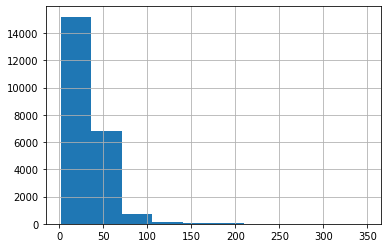

In [29]:
data['living_area'].hist()
#выбросы ожидаемые, оставляем как есть

In [30]:
#Наконец, проверим явные дубликаты и при их наличии, удалим
data.duplicated().sum()
#явных дубликатов нет

0

In [31]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 
          'floor',  'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,050.00","23,050.00","23,050.00","19,967.00","23,050.00","23,050.00","23,050.00","23,050.00","22,967.00"
min,1.00,13.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,500.00,8.30,"1,580.00","763,000,000.00",347.50,107.00,33.00,52.00


In [32]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7996
2,7775
3,5657
4,1133
5,310
6,96
7,55
8,11
9,8
10,3


***НОВАЯ ФИЛЬТРАЦИЯ АНОМАЛЬНЫХ ЗНАЧЕНИЙ***

In [33]:
data = data.loc[data['rooms'] <= 5]
data = data.loc[data['total_area'] <200]
data = data.loc[data['ceiling_height'] < 8 ] 
data = data.loc[data['ceiling_height'] > 2]
data = data.loc[data['living_area'] <=100]
data = data.loc[data['living_area'] >=5]
data = data.loc[data['kitchen_area'] <=100]
data = data.loc[data['kitchen_area'] >=3]
data = data.loc[data['floors_total'] >= data['floor']]
data = data.loc[data['last_price'] >=100000]

In [34]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 
          'floor',  'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,523.00","22,523.00","22,523.00","19,561.00","22,523.00","22,523.00","22,523.00","22,523.00","22,523.00"
min,1.00,17.20,2.25,1.00,"430,000.00",5.00,3.00,1.00,1.00
max,5.00,198.00,5.50,"1,580.00","330,000,000.00",100.00,93.20,33.00,52.00


In [35]:
data.kitchen_area.value_counts().to_frame().head(50)

,kitchen_area
6.0,1271
10.0,1225
8.0,1087
9.0,1073
7.0,1072
11.0,775
12.0,625
8.5,411
5.5,397
14.0,380


**Выводы:** Была выполнена певоначальная предобработка данных. Были заполнены пропуски в уместных местах.Пропуски высоты потолков, этажности здания, количества находящихся рядом парков, водоемов и нахождения от аэропортов и центров населенных пунктов заменены на медианные значения по каждому населенному пункту. Строки с отсутсвующей локацией поменяли на no_info, с отсутствующим балконом, parks_around3000, ponds_around3000 на 0, is_apartment на False. Пустые значения жилой площади и площади кухни поменяли на средние по всему датасету. Nan-значения в days_exposition сознательно не меняли. Также поменяли типы у некоторых столбцов (floors_total, balcony, parks_around3000, parks_around3000 на int, is_apartment на bool, locality_name на str. Также удалили неявные дубликаты в названиях локаций. Наконец, были удалены аномальные значения по резултатам анализа столбцов ceiling_height, rooms, total_area, floors_total.

### Посчитайте и добавьте в таблицу новые столбцы

In [36]:
#Добавим в таблицу цену одного квадратного метра
data['price_of_square_meter'] = round(data['last_price']/data['total_area'], 1)
#Добавим в таблицу день недели публикации(в нашем случае будет 0 - понедельник, 1 - вторник и т.д.
data['day_of_the_week_exposition'] = data['first_day_exposition'].dt.dayofweek
#Добавим в таблицу месяц публикации
data['month_exposition'] = data['first_day_exposition'].dt.month
#Добавим в таблицу год публикации
data['year_exposition'] = data['first_day_exposition'].dt.year
#Добавим в таблицу тип этажа (первый, последний, другой)
def type_of_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['type_of_floor'] = data.apply(type_of_floor, axis=1)
#Добавим в таблицу округленное до целых значений расстояние до центра города в километрах
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 0)
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_no_duplicates,price_of_square_meter,day_of_the_week_exposition,month_exposition,year_exposition,type_of_floor,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2,755.0,NaN,Санкт-Петербург,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.600000,1,False,...,0,587.0,81.0,посёлок Шушары,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,2,574.0,558.0,Санкт-Петербург,92785.7,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,89.797718,9,False,...,3,234.0,424.0,Санкт-Петербург,408176.1,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1,48.0,121.0,Санкт-Петербург,100000.0,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.60,12.0,14.400000,5,False,...,0,503.0,55.0,городской посёлок Янино-1,95065.8,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.600000,6,False,...,0,593.0,155.0,посёлок Парголово,99195.7,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,40.437211,22,False,...,0,503.0,NaN,Санкт-Петербург,110544.7,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,...,0,503.0,189.0,посёлок Мурино,87454.8,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,0,503.0,289.0,Санкт-Петербург,88524.6,6,2,2017,другой,15.0


**Вывод:** В таблицу были добавлены следующие параметры: 
1) цена одного квадратного метра;
2) день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3) месяц публикации объявления;
4) год публикации объявления;
5) тип этажа квартиры (значения — «первый», «последний», «другой»);
6) расстояние до центра города в километрах.

### Проведите исследовательский анализ данных

<AxesSubplot:title={'center':'общая площадь'}, ylabel='Frequency'>

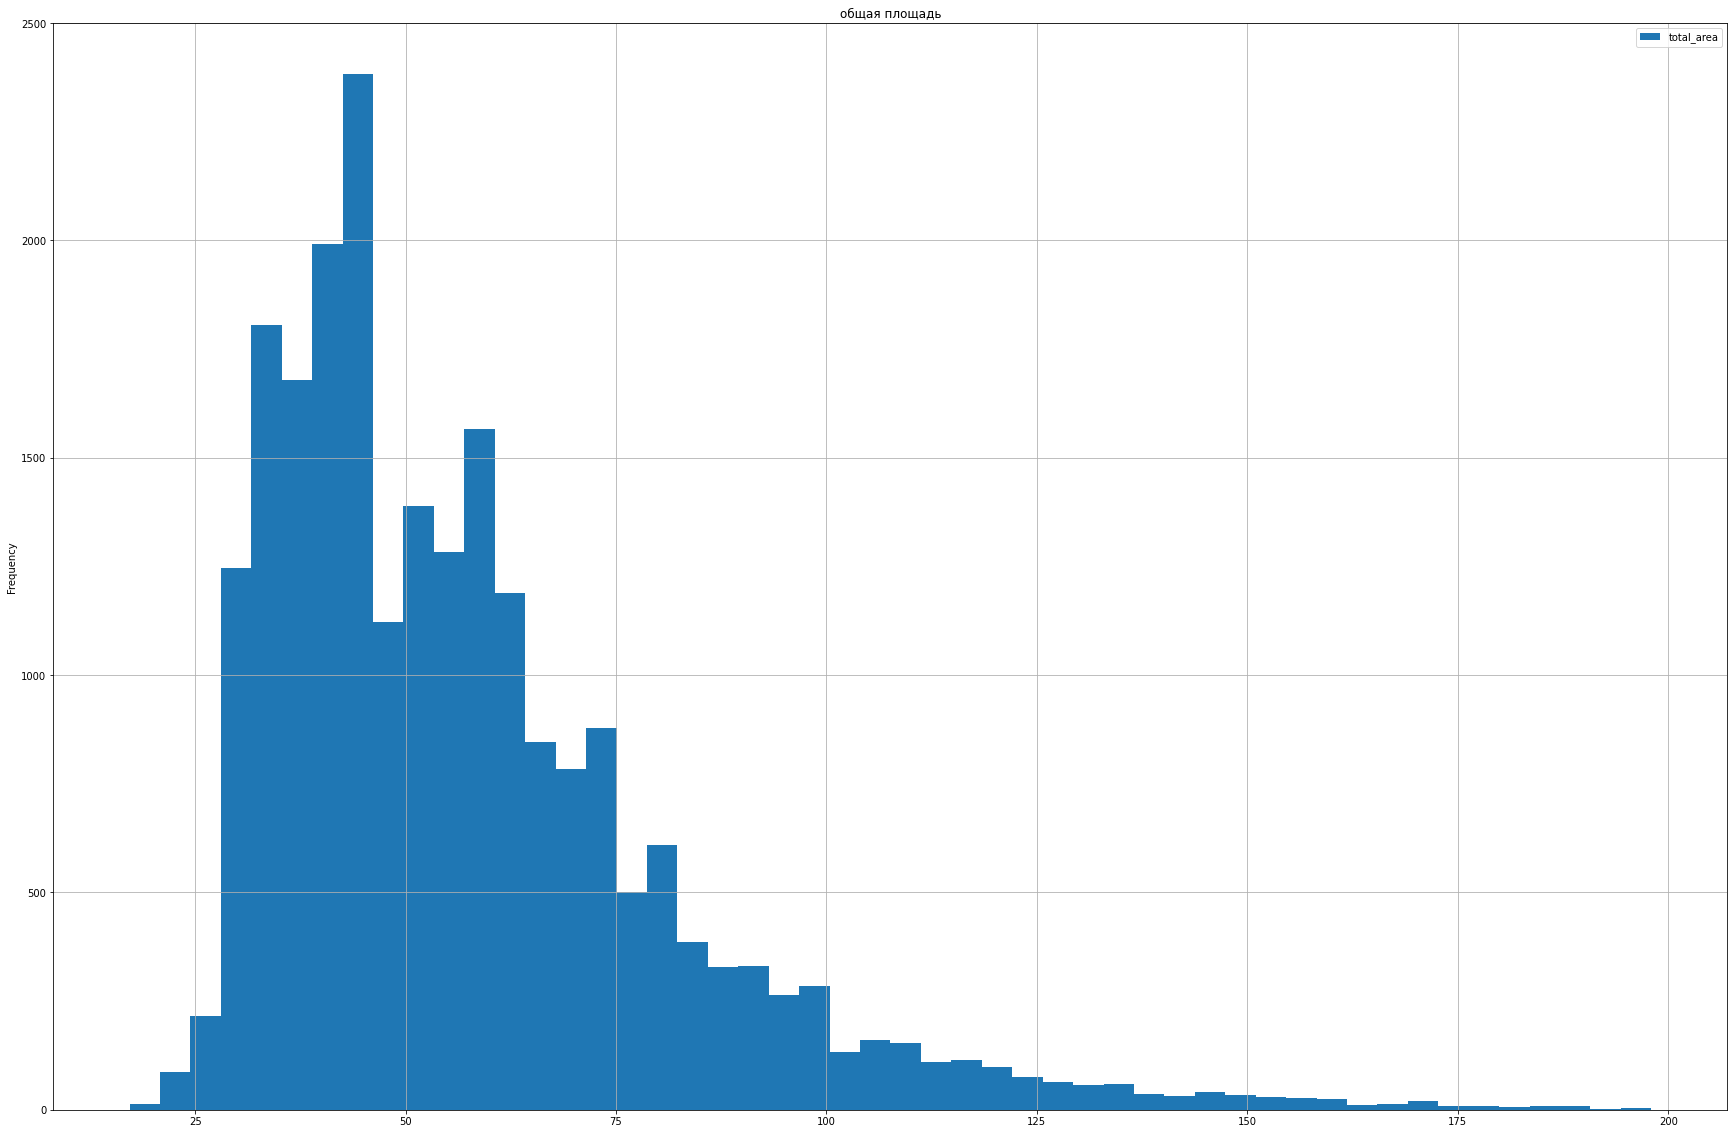

In [37]:
data.plot(kind='hist', title='общая площадь', y='total_area', bins=50, grid=True, figsize=(30,20))

Распределение по общей площади соответствует распределению Пуассона. Есть пиковые значения Но, вместе с тем, при возрастании площади можно увидеть пиковые значения при 30, 40 и 60 кв.м.

Общий тренд по жилой площади похож на распределение Пуассона. Есть три пика в 17,30 и 44.

<AxesSubplot:title={'center':'площадь кухни'}, ylabel='Frequency'>

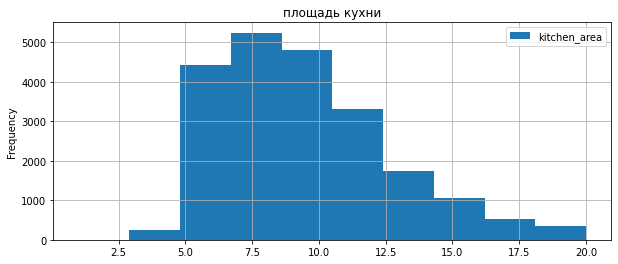

In [39]:
data.plot(kind='hist', title='площадь кухни', y='kitchen_area', bins=10, grid=True, figsize=(10,4), range=(1, 20))

Распределение площадей кухни близко к распределению Пуассона. Это может быть обусловлено ествественным ограничением минимального размера площадей кухонь.

<AxesSubplot:title={'center':'цена объекта'}, ylabel='Frequency'>

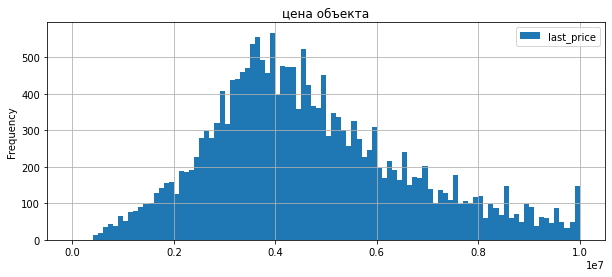

In [40]:
data.plot(kind='hist', title='цена объекта', y='last_price', bins=100, grid=True, figsize=(10,4), range=(0,10000000))

Распределение цены напоминает нормальное Гауссовское распределение. Медленное снижение плотности распределения по сравнению с ростом говорит о преобладании недвижимости с высокой ценой.

<AxesSubplot:title={'center':'количество комнат'}, ylabel='Frequency'>

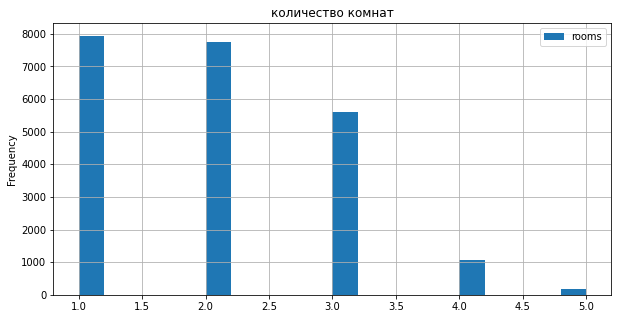

In [41]:
data.plot(kind='hist', title='количество комнат', y='rooms', bins=20, grid=True, figsize=(10,5))

Для количества комнат видим распределение Пуассона.

<AxesSubplot:title={'center':'высота потолков'}, ylabel='Frequency'>

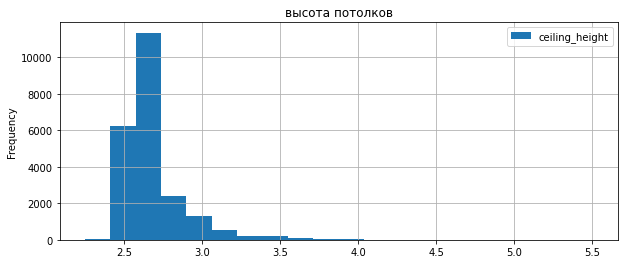

In [42]:
data.plot(kind='hist', title='высота потолков', y='ceiling_height', bins=20, grid=True, figsize=(10,4))

Для высоты потолков также видим распределение Пуассона.

<AxesSubplot:title={'center':'этаж помещения'}, ylabel='Frequency'>

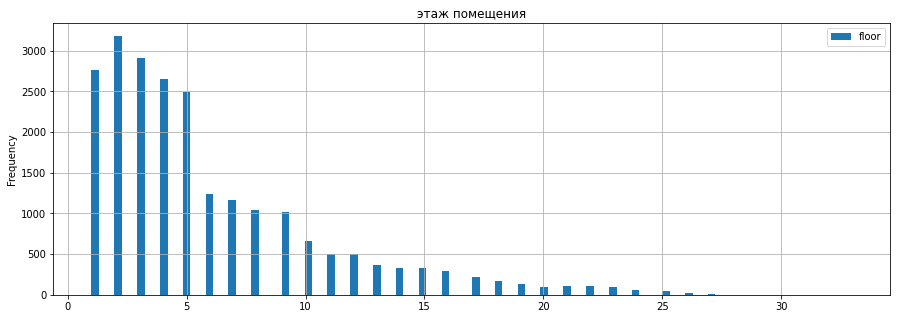

In [43]:
data.plot(kind='hist', title='этаж помещения', y='floor', bins=100, grid=True, figsize=(15,5))

По этажности видим распределение Пуассона, где преимущество значений до 5-ти этажей включительно.

<AxesSubplot:>

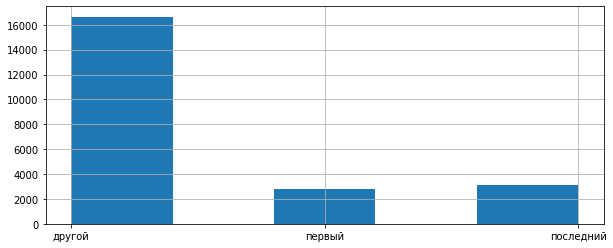

In [44]:
data['type_of_floor'].hist(bins=5, grid=True, figsize=(10,4))

Большинство помещений находятся на других этажах, помещения на первом и последних этажах распределены примерно одинаково.

<AxesSubplot:title={'center':'расстояние до центра города в метрах'}, ylabel='Frequency'>

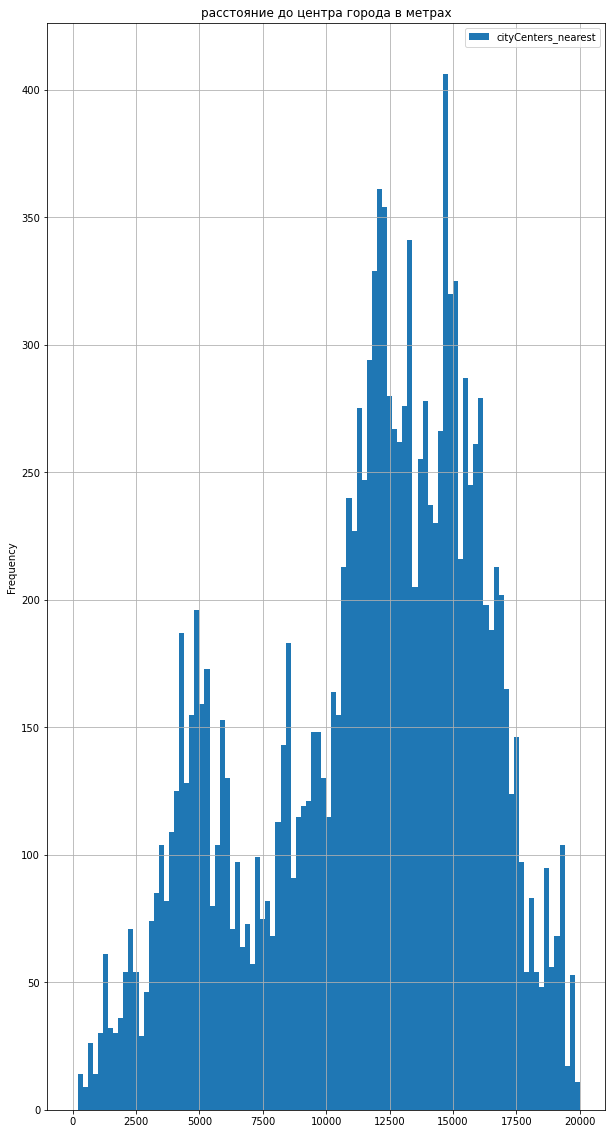

In [45]:
data.plot(kind='hist', title='расстояние до центра города в метрах', y='cityCenters_nearest', bins=100, grid=True, figsize=(10,20), range= (0,20000))

На диаграмме распределения расстояния до центра города видно несколько пиков, самые очевидные в районе 11000 и 14000. Это показывает неравномерность плотности жилой застройки.

<AxesSubplot:title={'center':'расстояние до ближайшего аэропорта'}, ylabel='Frequency'>

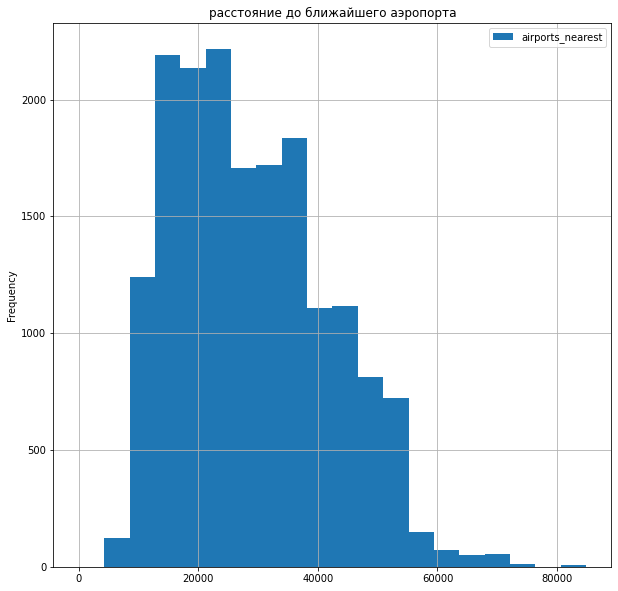

In [46]:
data.plot(kind='hist', title='расстояние до ближайшего аэропорта', y='airports_nearest', bins=20, grid=True, figsize=(10,10))

Распределение значений расстояний до аэропорта представляет распределение Пуассона.

<AxesSubplot:title={'center':'расстояние до ближайшего парка'}, ylabel='Frequency'>

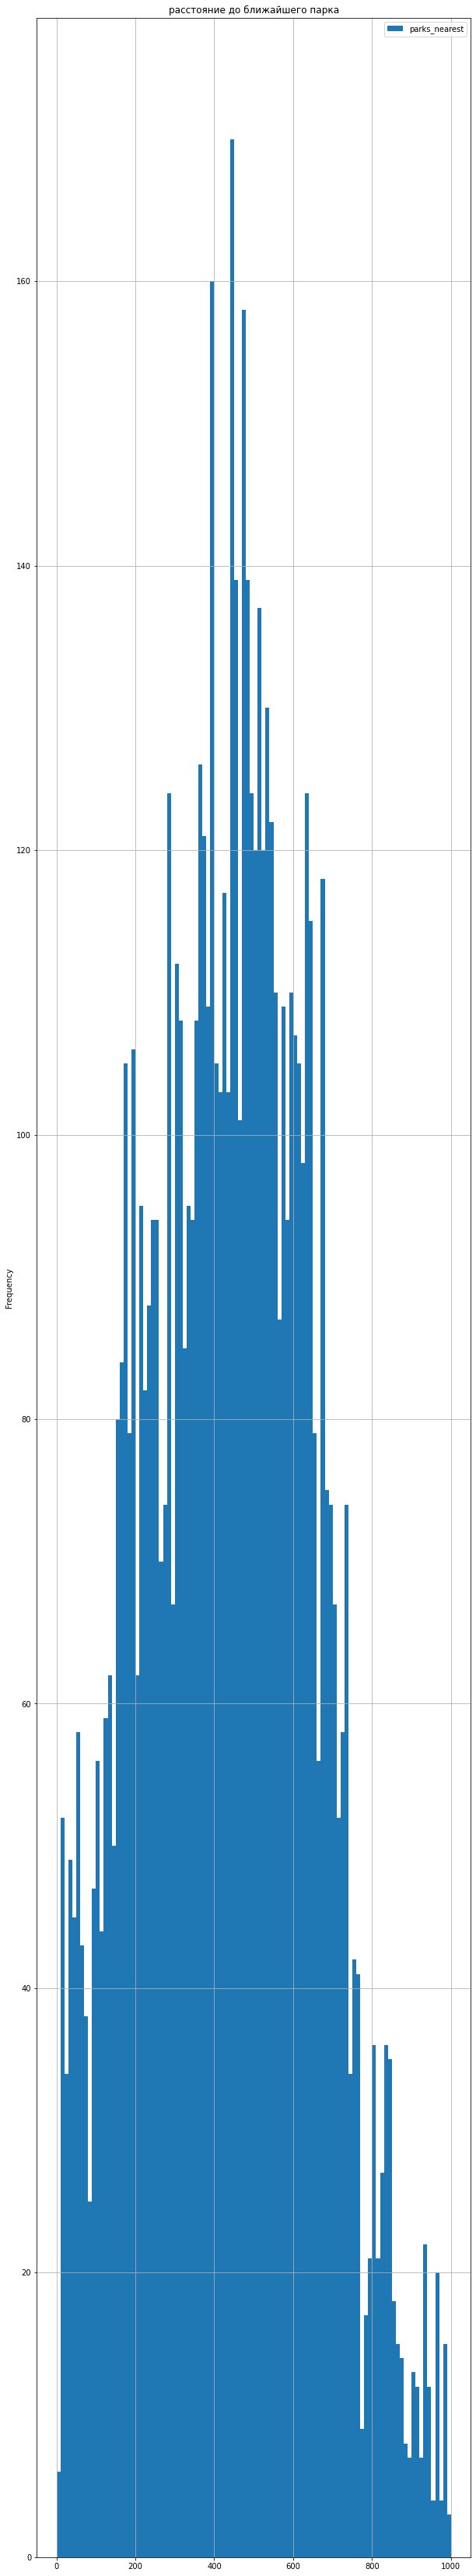

In [47]:
data.plot(kind='hist', title='расстояние до ближайшего парка', y='parks_nearest', bins=100, grid=True, figsize=(10,60),range=(0,1000))

Значения расстояний до парка имеют несколько пиков, самый очевидный в районе 400,450 и 500 м.

<AxesSubplot:title={'center':'день публикации'}, ylabel='Frequency'>

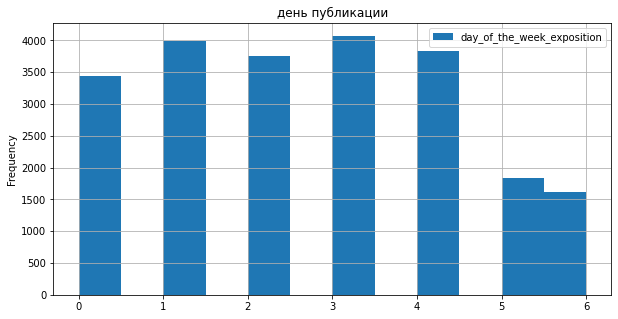

In [48]:
data.plot(kind='hist', title='день публикации', y='day_of_the_week_exposition', bins=12, grid=True, figsize=(10,5) )

Судя по графику, объявления чаще всего публикуются в рабочие дни.

<AxesSubplot:title={'center':'месяц публикации объявления'}, ylabel='Frequency'>

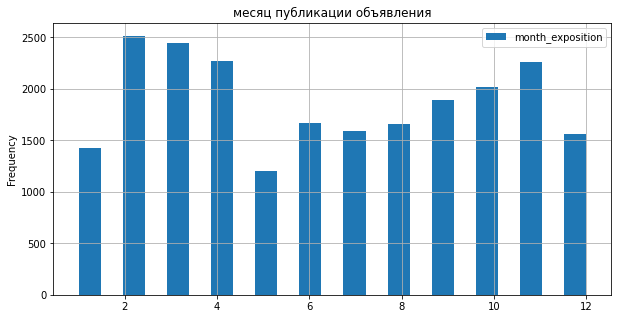

In [49]:
data.plot(kind='hist', title='месяц публикации объявления', y='month_exposition', bins=23, grid=True, figsize=(10,5) )

На графике видим пики сезонности подачи объявлений - февраль-март и октябрь-ноябрь.

<AxesSubplot:title={'center':'этажность дома'}, ylabel='Frequency'>

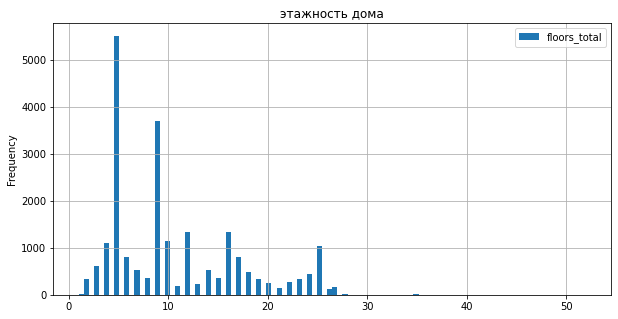

In [50]:
#Добавляю гистограмму по общему количеству этажей в доме
data.plot(kind='hist', title='этажность дома', y='floors_total', bins=100, grid=True, figsize=(10,5))

На графике видим распределение Пуассона, а также большое преимущество значений до 5-ти этажей включительно, как и 9-ти этажей.

Теперь изучим, как быстро продавались помещения. 

Среднее количество дней продажи 179.34471652778487
Медиана по дням продажи 95.0


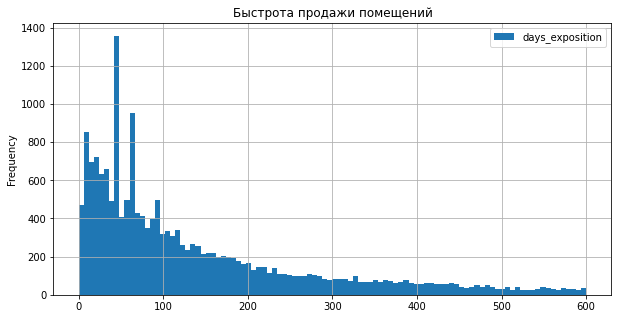

In [51]:
data.plot(kind='hist', title='Быстрота продажи помещений', y='days_exposition', bins=100, grid=True, figsize=(10,5), range=(0,600))
print('Среднее количество дней продажи', data['days_exposition'].mean())
print('Медиана по дням продажи', data['days_exposition'].median())

На гравике видим распределение Пуассона, а медиана почти в два раза ниже среднего значения по дням продаж. Это может быть объяснено влияние выбросов (например, непродаваемые элитные недвижимости) на среднее значение.

In [52]:
data['days_exposition'].describe()

count    19561.000000
mean       179.344717
std        217.929832
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

Можно сделать вывод что относительно быстрой продажей можно считать период от 45 до 95 дней. Менее 45 дней - это очень быстро. Продажи более 230 дней можно считать необычно долгими. 

На графике видны пики на значениях примерно 42-45 и 55-60 дней. Это может быть связано с тем, что через некоторое время продавец снижает цену и вследствии находит покупателя.

Теперь рассмотрим, какие факторы влияют на полную стоимость обьекта.

Коэффициент корреляции цены от общей площади 0.64


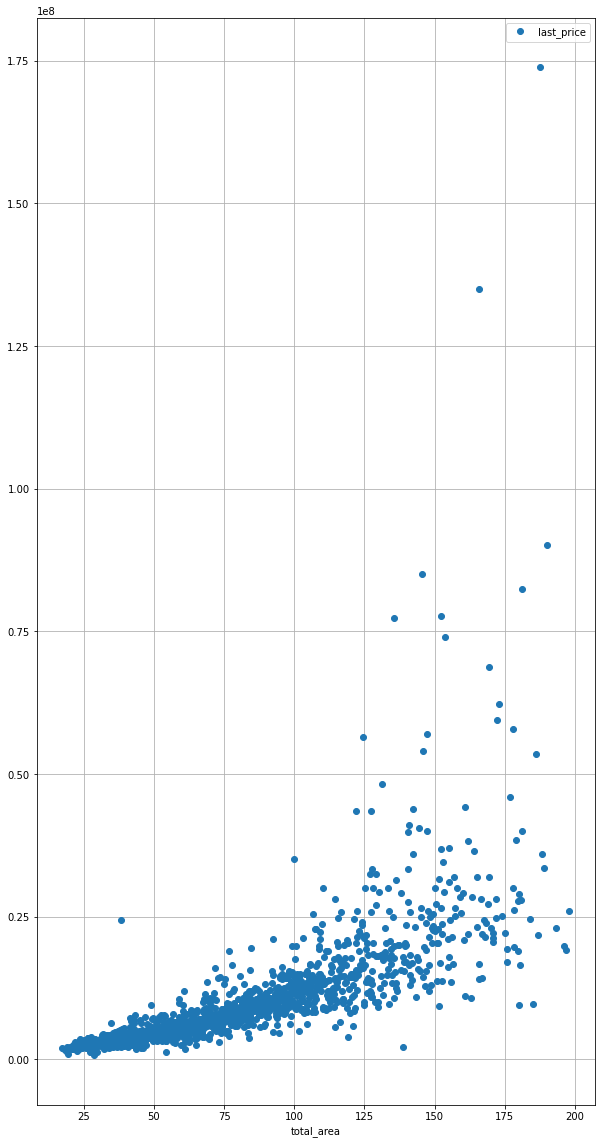

In [53]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(10, 20))
print('Коэффициент корреляции цены от общей площади', round(data['total_area'].corr(data['last_price']), 2))

На графике зависимости средней цены от общей площади виден минимальный разброс цен для площади до 100-120 кв.м, средний разброс цен от 120 до 180 кв.м, и максимальный разброс цен для площадей свыше 180 кв.м. Коэффициент корреляции = 0,63, что подтверждает наличие умеренной зависимости.

Коэффициент корреляции цены от жилой площади 0.53


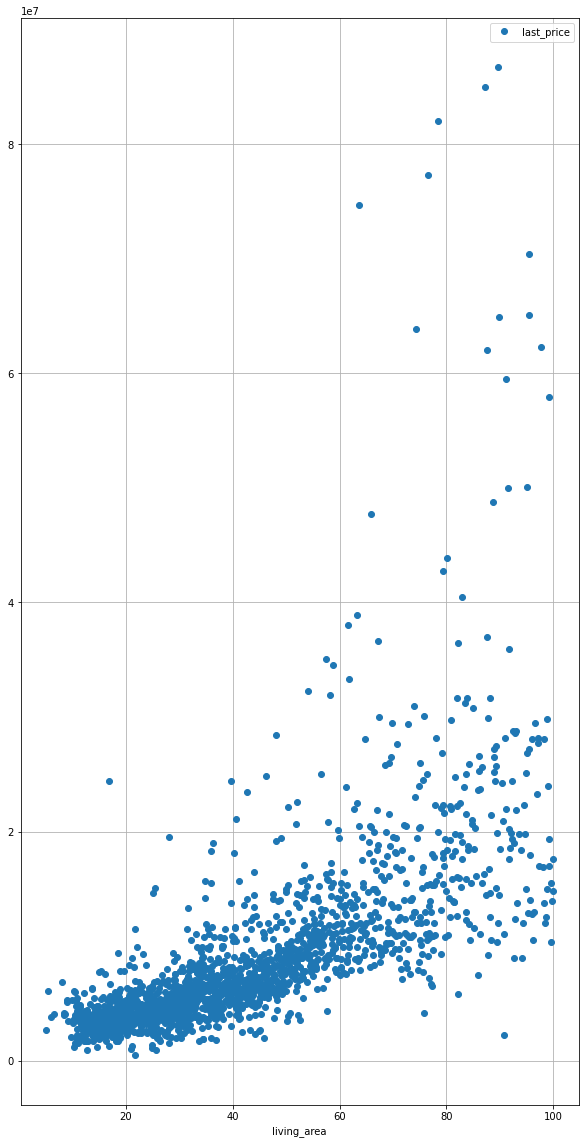

In [54]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(10, 20))
print('Коэффициент корреляции цены от жилой площади', round(data['living_area'].corr(data['last_price']), 2))

Расчет корреляции показывает, что зависимость цены от жилой площади не так сильна. Зависимость на графике четко прослеживается для площадей от 10 до 60 кв.м.

Коэффициент корреляции цены от площади кухни 0.53


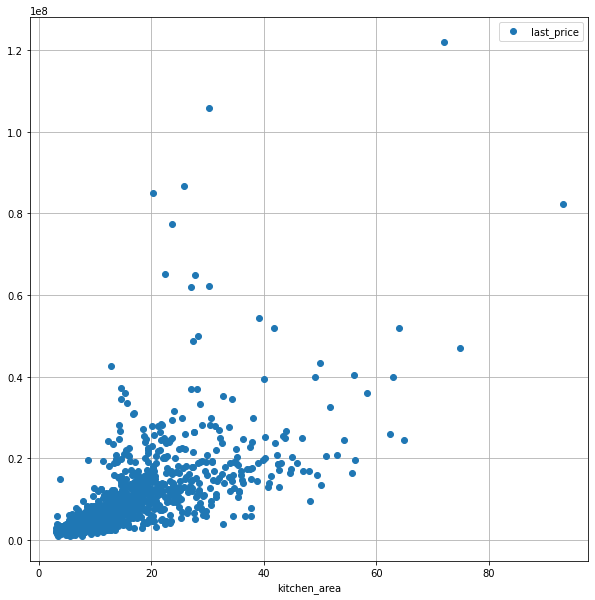

In [55]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10))
print('Коэффициент корреляции цены от площади кухни', round(data['kitchen_area'].corr(data['last_price']), 2))

Коэффициент корреляции и график показывают слабую зависимость цены от площади кухни.

Коэффициент корреляции цены от количества комнат 0.35


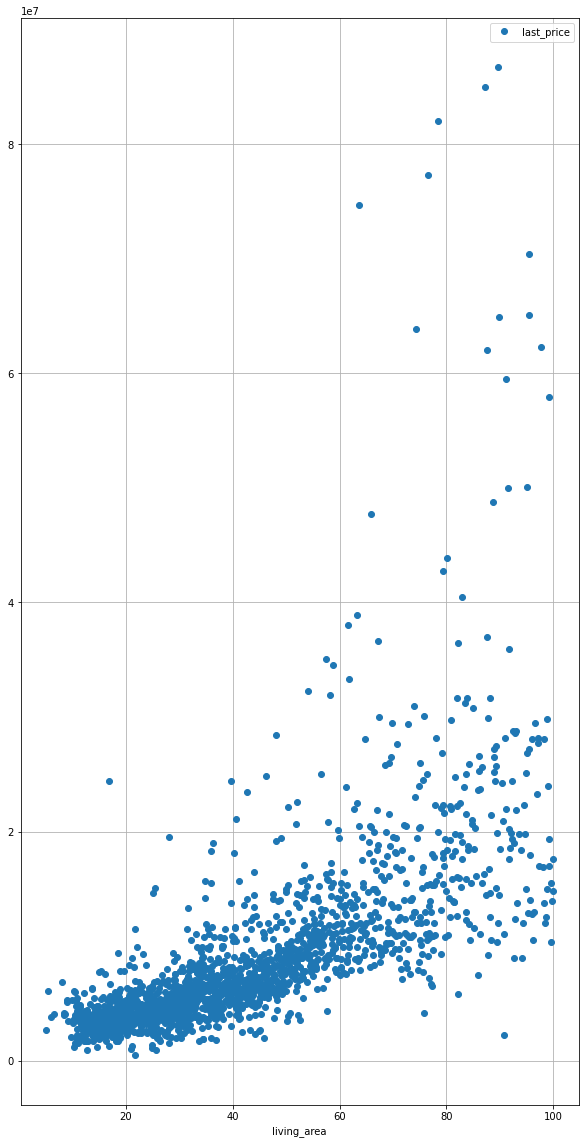

In [56]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(10, 20))
print('Коэффициент корреляции цены от количества комнат', round(data['rooms'].corr(data['last_price']), 2))

Расчёт коэффициента корреляции показывает очень слабую зависимости цены от количества комнат.

<AxesSubplot:title={'center':'Зависимость цены от типа этажа'}, xlabel='type_of_floor'>

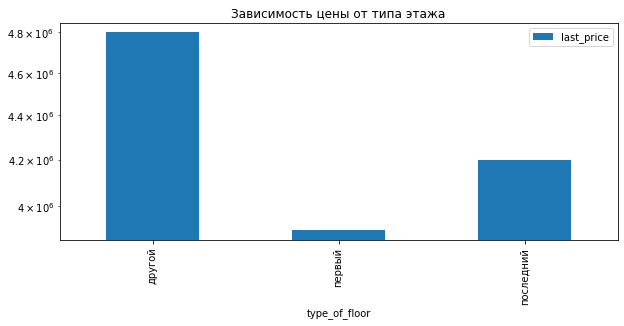

In [57]:
#Для анализа зависимости от этажа проанализируем медианные значения
data.pivot_table(index='type_of_floor', values='last_price', aggfunc=('median')).plot(style='-',title='Зависимость цены от типа этажа', figsize=(10,4), kind='bar', logy=True)

Коэффициент корреляции цены от этажа 0.05


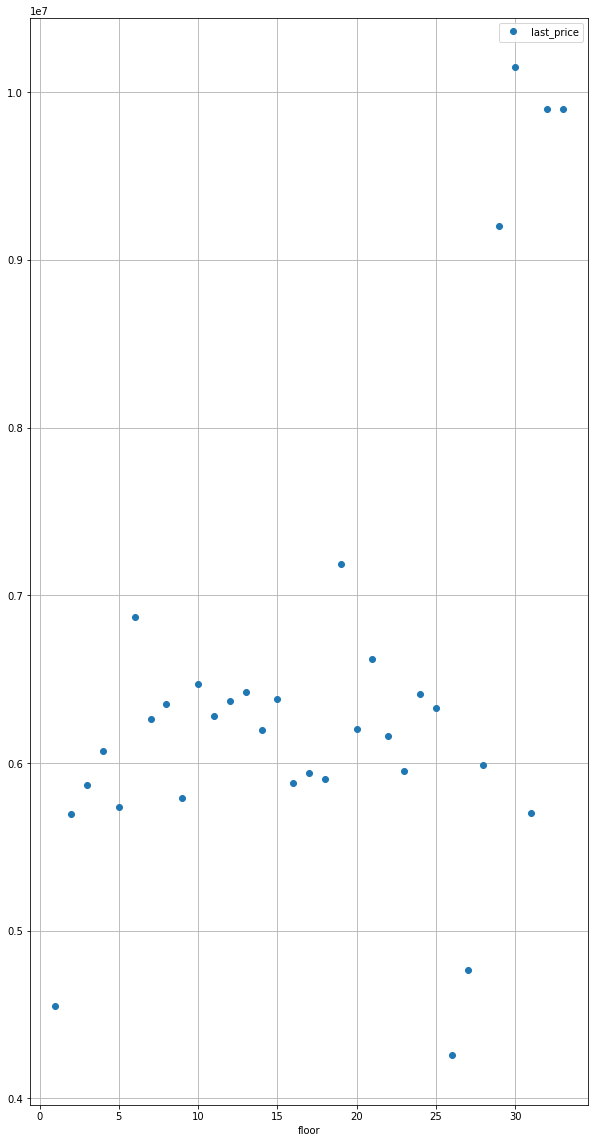

In [58]:
data.pivot_table(index='floor', values='last_price').plot(grid=True, style='o', figsize=(10, 20))
print('Коэффициент корреляции цены от этажа', round(data['floor'].corr(data['last_price']), 2))

Анализ значений показывает, что первые этажи имеют наиболее низкую стоимость, а стоимость последних этажей снижена по сравнению с остальными. Коэффицент же показывает, что сам этаж почти не влияет на итоговую цену помещения. График и вычисления же показывают, что корреляции между этажом и ценой помещения нет.

Коэффициент корреляции цены от дня недели размещения объявления -0.01


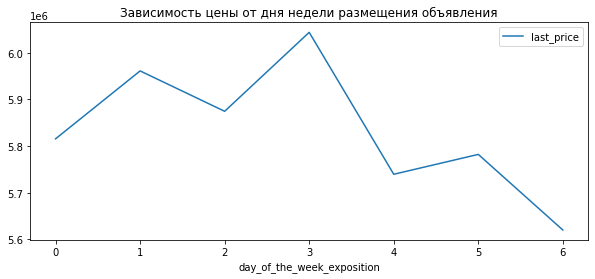

In [59]:
data.pivot_table(index='day_of_the_week_exposition', values='last_price').plot(style='-',title='Зависимость цены от дня недели размещения объявления', figsize=(10,4))
print('Коэффициент корреляции цены от дня недели размещения объявления', round(data['day_of_the_week_exposition'].corr(data['last_price']), 2))

Согласно вычислениям и графику, зависимость цены от дня недели отсутсвует.

Коэффициент корреляции цены от месяца размещения объявления 0.0


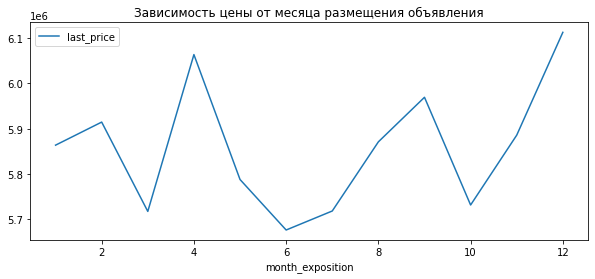

In [60]:
data.pivot_table(index='month_exposition', values='last_price').plot(style='-',title='Зависимость цены от месяца размещения объявления', figsize=(10,4))
print('Коэффициент корреляции цены от месяца размещения объявления', round(data['month_exposition'].corr(data['last_price']), 2))

Согласно вычислениям, зависимость цены от месяца отсутсвует. На графике же видим пики сезонности: апрель и сентябрь; в мае и октябре спад цен.

Коэффициент корреляции цены от года размещения объявления -0.03


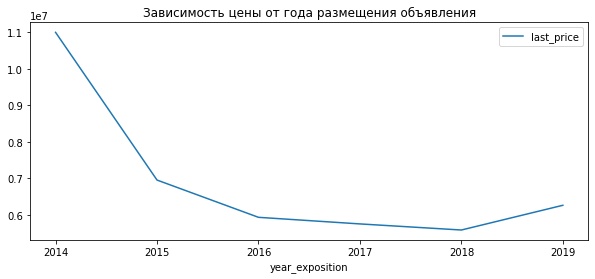

In [61]:
data.pivot_table(index='year_exposition', values='last_price').plot(style='-',title='Зависимость цены от года размещения объявления', figsize=(10,4))
print('Коэффициент корреляции цены от года размещения объявления', round(data['year_exposition'].corr(data['last_price']), 2))

Коэффициент корреляции показывает отсутствие зависимости цены от года подачи объявления. На графике видим отрицательную динамику цен, что может говорить о возрастании популярности помещений с низкой ценой.

Теперь посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [62]:
#выведем на экран топ 10 населённых пунктов с наибольшим числом объявлений
data.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean', 'median']).sort_values(('count', 'last_price'), ascending=False).head(10).sort_values(('mean', 'last_price'), ascending=False)

,count,mean,median
,last_price,last_price,last_price
locality_name,,,
Санкт-Петербург,14821,7.084560e+06,5450000.0
Пушкин,355,6.102696e+06,5150000.0
посёлок Парголово,323,4.465048e+06,4100000.0
деревня Кудрово,286,4.245711e+06,3800000.0
посёлок Шушары,432,4.120931e+06,3990000.0
Колпино,333,3.859100e+06,3600000.0
Всеволожск,381,3.799531e+06,3500000.0
посёлок Мурино,489,3.715633e+06,3420000.0


Из 10 локаций с наибольшим количеством объявлений, макимальная средняя стоимость в Санкт-Петербурге, минимальная средняя стоимость в Выборге.

***ИСПРАВЛЕННЫЙ РАСЧЕТ ТОП10***

In [63]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_most = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_most.index)').pivot_table(values='price_of_square_meter', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('price_of_square_meter', ascending=False)

,price_of_square_meter
locality_name,
Санкт-Петербург,112727
Пушкин,102882
деревня Кудрово,92196
посёлок Парголово,90207
посёлок Мурино,85148
посёлок Шушары,78278
Колпино,75380
Гатчина,68746
Всеволожск,68591


Наконец, рассмотрим, как стоимость объектов зависит от расстояния до центра города. Для примера возьмем Санкт-Петербург. Мы выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

<AxesSubplot:title={'center':'Зависимость стоимости от близости к центру СПб'}, xlabel='cityCenters_nearest_km'>

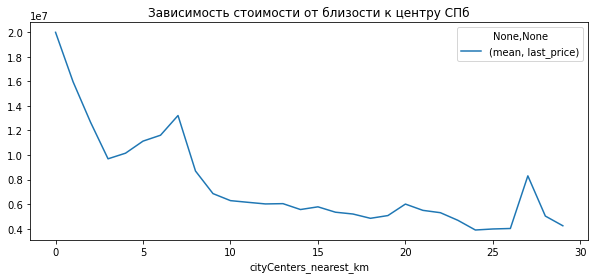

In [64]:
data[data['locality_name']=='Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values=['last_price'], aggfunc=['mean']).plot(style='-',title='Зависимость стоимости от близости к центру СПб', figsize=(10,4))

<AxesSubplot:title={'center':'Зависимость стоимости 1 кв.м от близости к центру СПб'}, xlabel='cityCenters_nearest_km'>

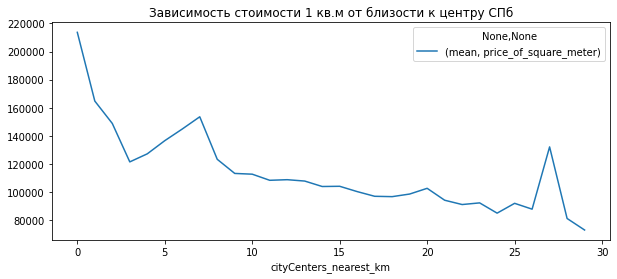

In [65]:
data[data['locality_name']=='Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values=['price_of_square_meter'], aggfunc=['mean']).plot(style='-',title='Зависимость стоимости 1 кв.м от близости к центру СПб', figsize=(10,4))

При анализе графика видим снижение средней стоимости помещения при удаления от центра. Наблюдается резкий рост цен на расстоянии от 0 до 2 км. от центра. Также видим пик роста цен на расстоянии 6-7 и 27 км. и снижение стоимости на расстоянии 3 км.

### Общий вывод

В проекте исследованы данные сервиса Яндекс Недвижимость за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Была выполнена предобработка данных. Были заполнены пропуски в уместных местах.Пропуски высоты потолков, этажности здания, количества находящихся рядом парков, водоемов и нахождения от аэропортов и центров населенных пунктов заменены на медианные значения по каждому населенному пункту. Строки с отсутсвующей локацией поменяли на no_info, с отсутствующим балконом, parks_around3000, ponds_around3000 на 0, is_apartment на False. Пустые значения жилой площади и площади кухни поменяли на средние по всему датасету. Nan-значения в days_exposition сознательно не меняли. Также поменяли типы у некоторых столбцов (floors_total, balcony, parks_around3000, parks_around3000 на int, is_apartment на bool, locality_name на str. Также удалили неявные дубликаты в названиях локаций. Наконец, были удалены аномальные значения по резултатам анализа столбцов ceiling_height, rooms, total_area, floors_total.

В таблицу были добавлены следующие параметры: 
1) цена одного квадратного метра;
2) день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3) месяц публикации объявления;
4) год публикации объявления;
5) тип этажа квартиры (значения — «первый», «последний», «другой»);
6) расстояние до центра города в километрах.

В ходе исследовательского анализа данных были сделаны определенные выводы по некоторым вопросам.

**Сроки продажи квартиры**

Относительно быстрой продажей можно считать период от 45 до 95 дней. Менее 45 дней - это очень быстро. Продажи более 230 дней можно считать необычно долгими. Были выделены пики на значениях примерно 42-45 и 55-60 дней. Это может быть связано с тем, что через некоторое время продавец снижает цену и вследствии находит покупателя. Присутсвуют и ситуации, когда помещения продавались несколько десятков месяцев.

**Факторы, влияющие на стоимость**

На общую стоимость больше влияет площадь квартиры, нежели число комнат. Помещения на первом этаж значительно дешевле, чем помещение на другом этаже. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

**Стоимость квадратного метра в топ-10 населённых пунктов**

Дороже всего квадратный метр в Санкт-Петербурге, а дешевле всего - в Выборге.

**Факторы, влияющие на стоимость в центре Санкт-Петербурга**

При анализе видим снижение средней стоимости помещения при удаления от центра. Наблюдается резкий рост цен на расстоянии от 0 до 2 км. от центра. Также видим пик роста цен на расстоянии 6-7 и 27 км. и снижение стоимости на расстоянии 3 км.